## **DBSCAN**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path, decimal=',') #

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [5]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

In [6]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


**First issue**

**duplicate rows**

In [7]:
# check duplicated data
df.duplicated().sum()   # output =0 , meaning that no duplicate rows

0

In [8]:
# check columns name
df.columns
 

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [9]:
#solution 
##Reformat columns names
columns_names = ['Country', 'Region', 'Population', 'Area, sq. km.',
       'Pop. Density, per sq. km.', 'Coastline (coast/area ratio)',
       'Net migration, %', 'Infant mortality, per 1000 births',
       'GDP, $ per capita', 'Literacy, %', 'Phones, per 1000', 'Arable, %',
       'Crops, %', 'Other, %', 'Climate', 'Birthrate, per 1000 inhabitants', 'Deathrate, per 1000 inhabitants',
       'Agriculture, %', 'Industry, %', 'Service, %']
 
df.columns = columns_names
 

In [10]:
#test 
df.columns

Index(['Country', 'Region', 'Population', 'Area, sq. km.',
       'Pop. Density, per sq. km.', 'Coastline (coast/area ratio)',
       'Net migration, %', 'Infant mortality, per 1000 births',
       'GDP, $ per capita', 'Literacy, %', 'Phones, per 1000', 'Arable, %',
       'Crops, %', 'Other, %', 'Climate', 'Birthrate, per 1000 inhabitants',
       'Deathrate, per 1000 inhabitants', 'Agriculture, %', 'Industry, %',
       'Service, %'],
      dtype='object')

In [11]:
# 
df['Agriculture, %'] *= 100
df['Industry, %'] *= 100
df['Service, %'] *= 100
df = df.round(decimals=3)


In [12]:
df.head()

,Country,Region,Population,"Area, sq. km.","Pop. Density, per sq. km.",Coastline (coast/area ratio),"Net migration, %","Infant mortality, per 1000 births","GDP, $ per capita","Literacy, %","Phones, per 1000","Arable, %","Crops, %","Other, %",Climate,"Birthrate, per 1000 inhabitants","Deathrate, per 1000 inhabitants","Agriculture, %","Industry, %","Service, %"
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,38.0,24.0,38.0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,23.2,18.8,57.9
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,10.1,60.0,29.8
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


**Handle categorical and numerical features**

In [13]:
# Handle categorical and numerical features
cat_name_features = [col for col in df.columns if df[col].dtype == object]
num_name_features = [col for col in df.columns if df[col].dtype != object]
totat_features = cat_name_features + num_name_features

print(f"categorical Datat :{cat_name_features}")
print(f"Numerical Datat :{num_name_features}")

categorical Datat :['Country', 'Region']
Numerical Datat :['Population', 'Area, sq. km.', 'Pop. Density, per sq. km.', 'Coastline (coast/area ratio)', 'Net migration, %', 'Infant mortality, per 1000 births', 'GDP, $ per capita', 'Literacy, %', 'Phones, per 1000', 'Arable, %', 'Crops, %', 'Other, %', 'Climate', 'Birthrate, per 1000 inhabitants', 'Deathrate, per 1000 inhabitants', 'Agriculture, %', 'Industry, %', 'Service, %']


In [14]:
# calculate summary statistics for numerical data
df[num_name_features].describe()

,Population,"Area, sq. km.","Pop. Density, per sq. km.",Coastline (coast/area ratio),"Net migration, %","Infant mortality, per 1000 births","GDP, $ per capita","Literacy, %","Phones, per 1000","Arable, %","Crops, %","Other, %",Climate,"Birthrate, per 1000 inhabitants","Deathrate, per 1000 inhabitants","Agriculture, %","Industry, %","Service, %"
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,15.084434,28.271090,56.528302
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,14.679795,13.827222,16.584100
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,2.000000,6.200000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,3.775000,19.300000,42.925000
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,9.900000,27.200000,57.100000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,22.100000,34.100000,67.850000
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,76.900000,90.600000,95.400000


In [15]:
# calculate summary statistics for categorical data
df[cat_name_features].describe()

,Country,Region
count,227,227
unique,227,11
top,Moldova,SUB-SAHARAN AFRICA
freq,1,51


**Second issue**

**Missing Values**

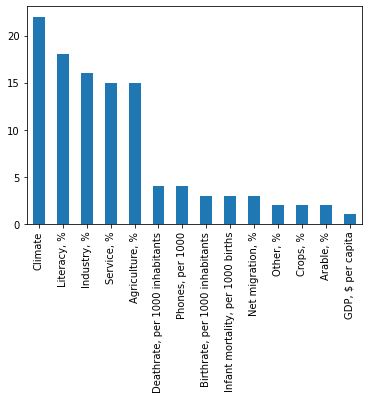

In [16]:
#Looking out for missing values and handling them
check_missing_values = df.isnull().sum()
# drop column with no missing values and sort it descending
miss_values = check_missing_values[check_missing_values>0]
miss_values.sort_values(ascending=False).plot.bar()


In [17]:
df['Climate'].value_counts()

2.0    111
3.0     48
1.0     29
1.5      8
4.0      6
2.5      3
Name: Climate, dtype: int64

In [18]:
# drop climate column , don't know what the encodings mean and it have too many missing values.
df.drop(columns=['Climate'], axis=1, inplace=True)

In [19]:
df['Literacy, %'].value_counts()

99.0     13
97.0     11
98.0     10
100.0     7
98.6      4
         ..
96.7      1
80.6      1
63.2      1
45.7      1
36.0      1
Name: Literacy, %, Length: 140, dtype: int64

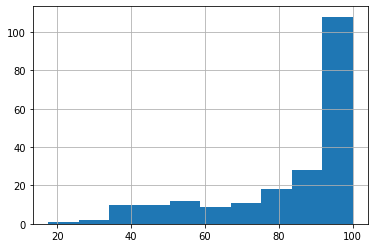

In [20]:
# show the distribution
df['Literacy, %'].hist()

In [21]:
# fill null values in Literacy column by median
df['Literacy, %'].fillna(value = df['Literacy, %'].median(), inplace = True)

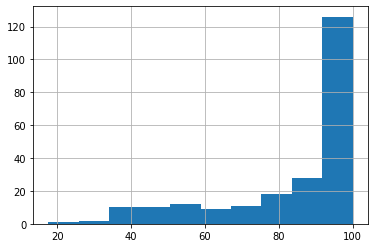

In [22]:
# After fill missing data by median()
# show the distribution
df['Literacy, %'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d29981790>,
      dtype=object)

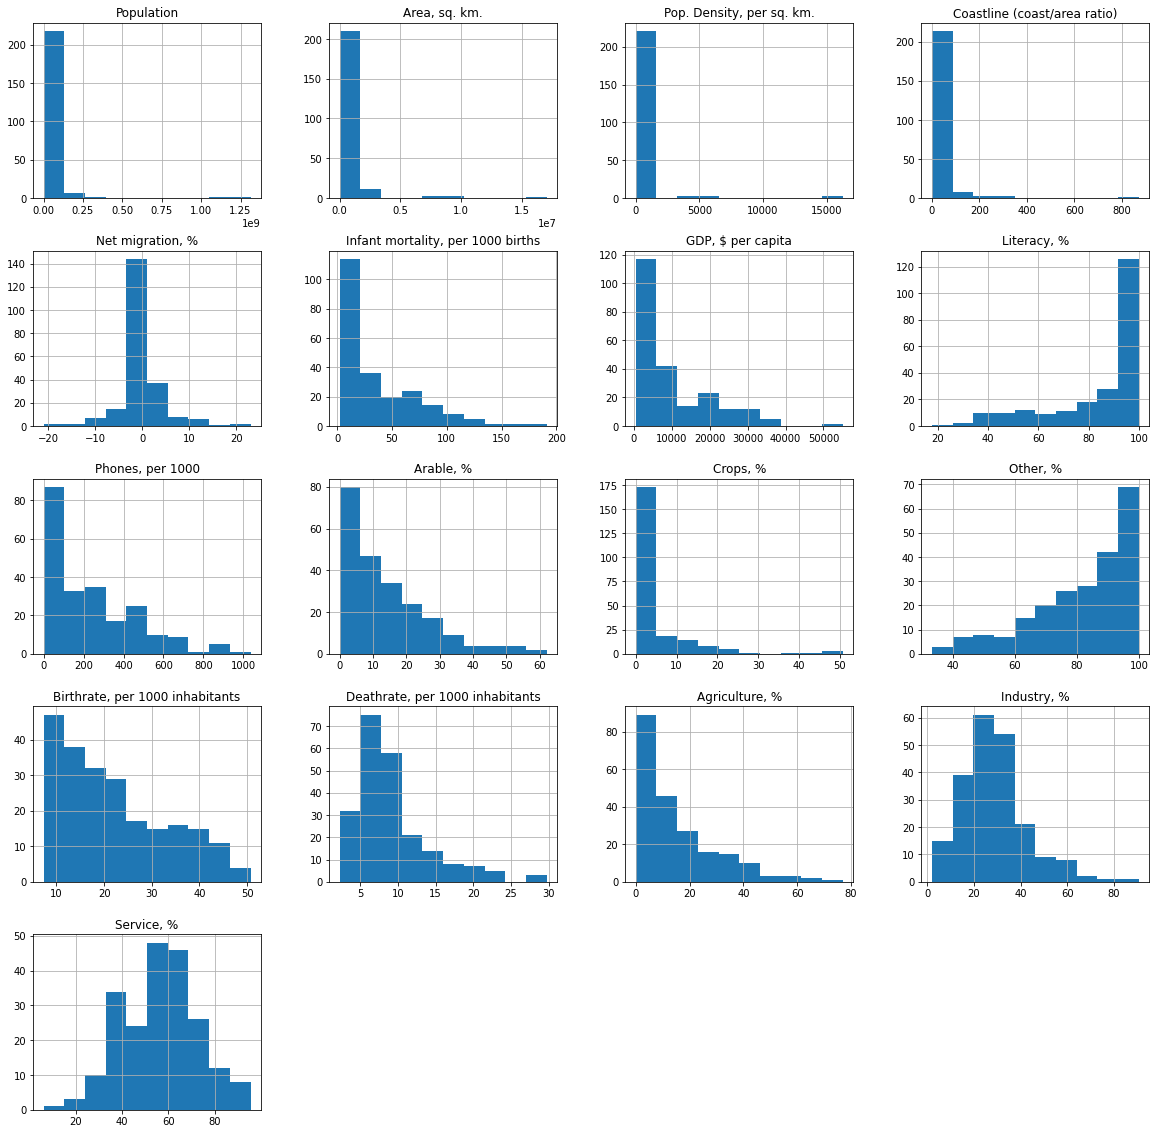

In [23]:
# show the distribution of all columns
df.hist(figsize = (20,20))

In [24]:
# fill null values by median, each column contains null values
df.fillna(value=df.median(), inplace=True)

In [25]:
#test 
# After handle missing values
#Looking out for missing values and handling them
check_missing_values = df.isnull().sum()
print(check_missing_values)

Country                              0
Region                               0
Population                           0
Area, sq. km.                        0
Pop. Density, per sq. km.            0
Coastline (coast/area ratio)         0
Net migration, %                     0
Infant mortality, per 1000 births    0
GDP, $ per capita                    0
Literacy, %                          0
Phones, per 1000                     0
Arable, %                            0
Crops, %                             0
Other, %                             0
Birthrate, per 1000 inhabitants      0
Deathrate, per 1000 inhabitants      0
Agriculture, %                       0
Industry, %                          0
Service, %                           0
dtype: int64


**Outliers**

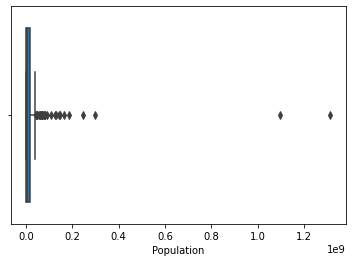

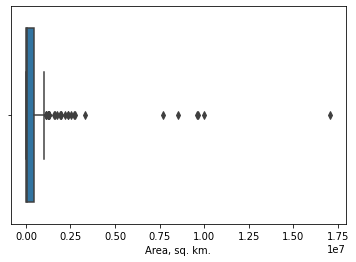

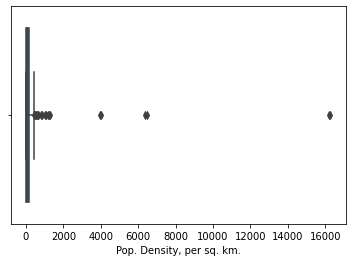

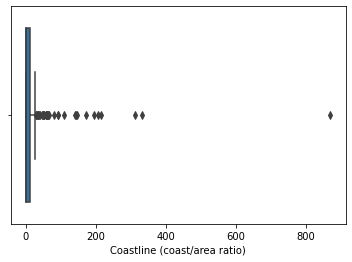

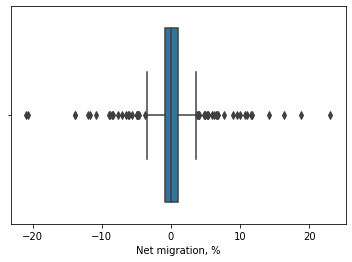

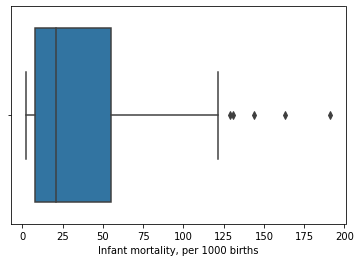

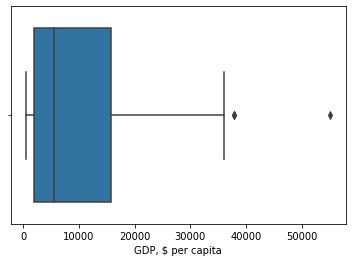

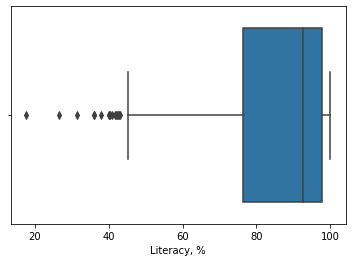

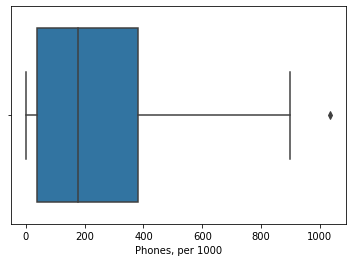

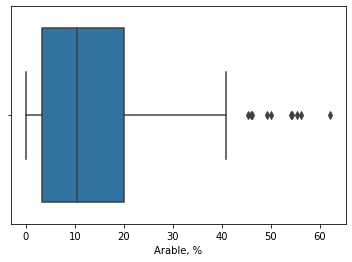

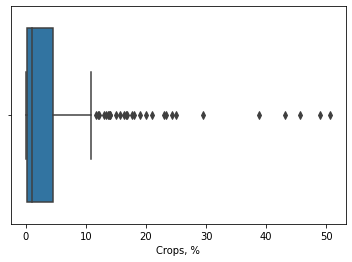

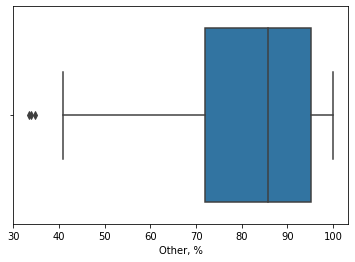

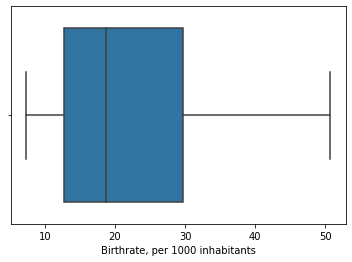

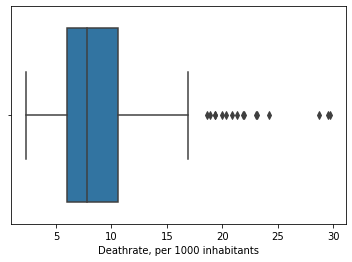

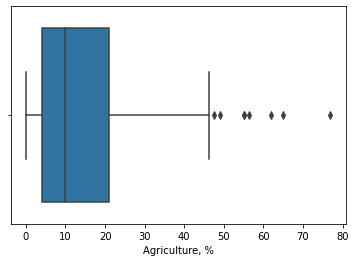

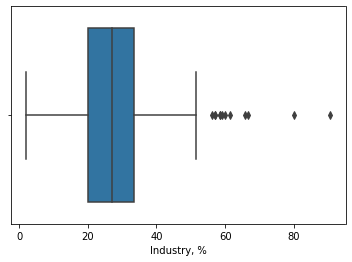

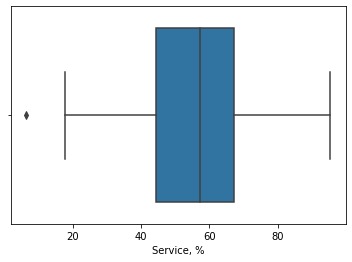

In [26]:
# check outlier to numerical data
for col in df.columns[2:]:
    sns.boxplot(df[col])
    plt.show()

In [ ]:
# most columns contain outliers, but I drop outliers in some column 
# drop outliers                                     # after i did it , the shape of dataset is (5, 19)
# df = df[df['Phones, per 1000']<900]
# df = df[df['Agriculture, %'] < 0.48]
# df = df[df['Service, %'] > 40]
# df = df[df['Other, %'] > 40]
# df = df[df['GDP, $ per capita']<38000] 


In [ ]:
#df.shape

In [ ]:
# so must handle outliers by another way 
# drop columns 
#df = df.drop(columns=['Phones, per 1000', 'Agriculture, %', 'Service, %', 'Other, %', 'GDP, $ per capita'] , axis=1)

In [27]:
df.head()

,Country,Region,Population,"Area, sq. km.","Pop. Density, per sq. km.",Coastline (coast/area ratio),"Net migration, %","Infant mortality, per 1000 births","GDP, $ per capita","Literacy, %","Phones, per 1000","Arable, %","Crops, %","Other, %","Birthrate, per 1000 inhabitants","Deathrate, per 1000 inhabitants","Agriculture, %","Industry, %","Service, %"
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,46.60,20.34,38.0,24.0,38.0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,15.11,5.22,23.2,18.8,57.9
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,17.14,4.61,10.1,60.0,29.8
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,22.46,3.27,9.9,27.2,57.1
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,8.71,6.25,9.9,27.2,57.1


**Visualize and deal with categorical data**

In [28]:
df['Country'].value_counts()

Moldova         1
Grenada         1
Reunion         1
Syria           1
Bulgaria        1
               ..
Mauritius       1
Israel          1
Jordan          1
Gambia, The     1
Ethiopia        1
Name: Country, Length: 227, dtype: int64

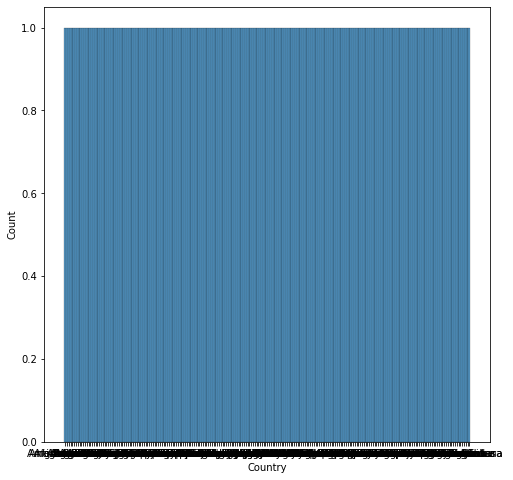

In [29]:
plt.figure(figsize=(8,8))
sns.histplot(df['Country'])

In [30]:
df['Region'].value_counts()

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
C.W. OF IND. STATES                    12
EASTERN EUROPE                         12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64

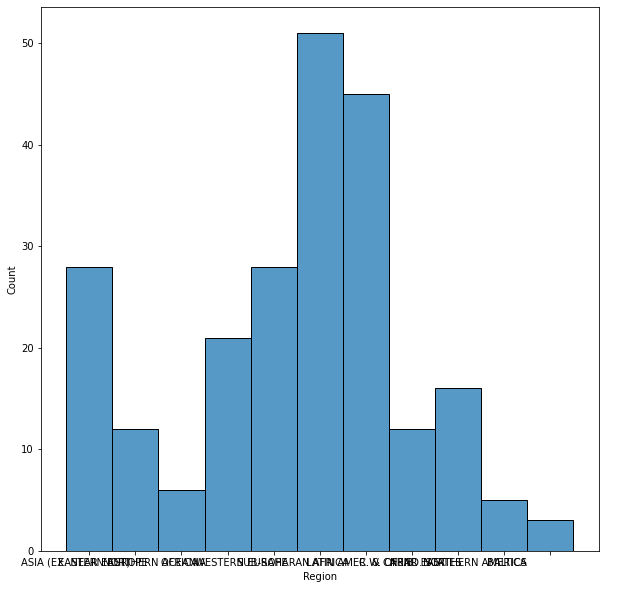

In [31]:
plt.figure(figsize=(10,10))
sns.histplot(df['Region'])

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [32]:
#drop two columns of categorical
data = df.drop(columns= ['Country', 'Region'], axis=1)
 

In [33]:
data.head()

,Population,"Area, sq. km.","Pop. Density, per sq. km.",Coastline (coast/area ratio),"Net migration, %","Infant mortality, per 1000 births","GDP, $ per capita","Literacy, %","Phones, per 1000","Arable, %","Crops, %","Other, %","Birthrate, per 1000 inhabitants","Deathrate, per 1000 inhabitants","Agriculture, %","Industry, %","Service, %"
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,46.60,20.34,38.0,24.0,38.0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,15.11,5.22,23.2,18.8,57.9
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,17.14,4.61,10.1,60.0,29.8
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,22.46,3.27,9.9,27.2,57.1
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,8.71,6.25,9.9,27.2,57.1


In [34]:
data.shape

(227, 17)

## **Implement PCA**

In [44]:
def pca(X):
  m, n = X.shape
  #mean-centered vectors
  X_n = X - np.mean(X , axis = 0) # axis= 0 to calculate mean by column 
  sigma = np.std(X, axis=0, ddof=1)
  X_n = X_n / sigma

  
  ##(PCA calculates the covariance matrix)
  cov_mat = np.cov(X_n , rowvar = False)
  ##(calculates the eigenvectors and eigenvalues of the covariance matrix)
  values , vectors = np.linalg.eig(cov_mat)

  return X_n, values, vectors

In [45]:
X_n, values, vectors = pca(data)

In [46]:
normalized_egienvalus = values / np.sum(values)

In [47]:
cum = np.cumsum(normalized_egienvalus)

In [48]:
x_axis = np.arange(0, len(cum))
y_axis = cum

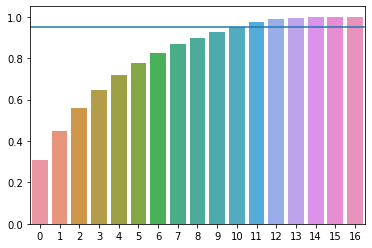

In [40]:
sns.barplot(x_axis, y_axis)
plt.axhline(0.95)

In [41]:
print(vectors.shape)

(17, 17)


In [42]:
data_pca = X_n @ vectors[:, 0:11]
print(data_pca.head())

         0         1         2   ...        8         9         10
0  5.004549  2.477787 -0.547075  ...  0.041177  0.084731 -1.038807
1  0.041212 -1.282139 -0.057412  ...  0.389389 -0.446031 -0.094727
2  0.817249  1.590077  1.531121  ...  0.228956 -0.297287  0.127507
3 -0.599210 -2.520155 -0.520102  ... -0.380323  0.226108  1.301372
4 -2.142335  1.704073 -0.345428  ...  0.565712 -0.670411  0.323055

[5 rows x 11 columns]


In [43]:
df_new = pd.DataFrame(data_pca)
df_new.to_csv('pca.csv')

## **implement DBSCAN**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score


# without pca

In [ ]:
z = StandardScaler()
data = z.fit_transform(data)

In [ ]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 2
nn = NearestNeighbors(mins + 1)

nn.fit(data)

distances, neighbors = nn.kneighbors(data)

#distances

In [ ]:
# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

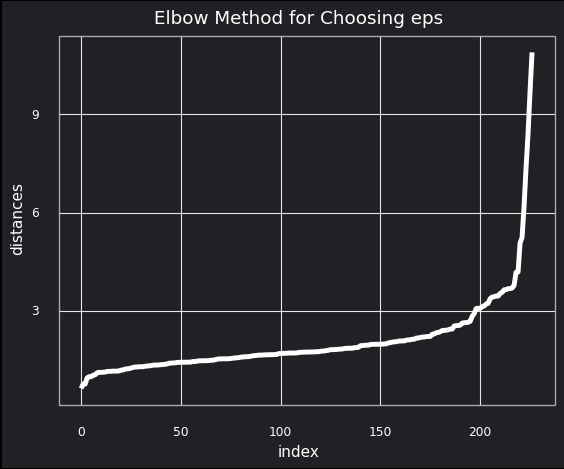

<ggplot: (8753229737185)>

In [ ]:
#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

In [ ]:
db6 = DBSCAN(eps = 3, min_samples = 2).fit(data)

# labsList = ["Noise"]
# labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db6.labels_)))]

# print(db6.labels_)
print(set(db6.labels_))

{0, 1, 2, 3, 4, -1}


In [ ]:
print(sum(db6.labels_ == -1))

18


In [ ]:
print(sum(db6.labels_ == 1))

2


In [ ]:
print(sum(db6.labels_ == 0))

199


In [ ]:
print(sum(db6.labels_ == 2))

2


In [ ]:
db6 = DBSCAN(eps = 2.8, min_samples = 2).fit(data)

# labsList = ["Noise"]
# labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db6.labels_)))]

# print(db6.labels_)
print(set(db6.labels_))

{0, 1, 2, 3, -1}


In [ ]:
print(sum(db6.labels_ == 1))

2


In [ ]:
print(sum(db6.labels_ == 0))

197


In [ ]:
print(sum(db6.labels_ == -1))

22


In [ ]:
print(sum(db6.labels_ == 3))

2


In [ ]:
# to measure performance by Silhouette_Score
metrics.silhouette_score(data, db6.labels_)

0.1691060943778179

## **With PCA**

In [ ]:
pca_data = pd.read_csv('pca.csv')

In [ ]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors(mins + 1)

nn.fit(pca_data)

distances, neighbors = nn.kneighbors(pca_data)

#distances

In [ ]:
# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

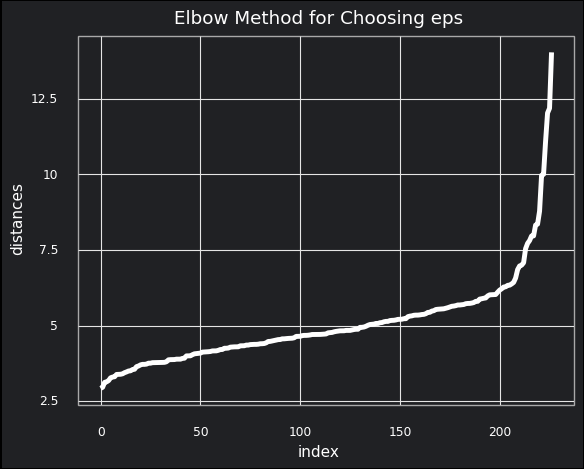

<ggplot: (8753229717385)>

In [ ]:
#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

In [ ]:
db6_pca = DBSCAN(eps = 5.3, min_samples = 3).fit(pca_data)

In [ ]:
print(set(db6_pca.labels_))

{0, 1, 2, 3, 4, -1}


In [ ]:
print(sum(db6.labels_ == 0))

197


In [ ]:
print(sum(db6.labels_ == 3))

2


In [ ]:
# to measure performance by Silhouette_Score
metrics.silhouette_score(pca_data, db6_pca.labels_)

0.29327626438877946